In [1]:
# Google Drive connection

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install youtube_dl

     |████████████████████████████████| 1.9 MB 5.3 MB/s 


In [3]:
!pip install pydub

In [4]:
!pip install audiosegment

     |████████████████████████████████| 66 kB 3.2 MB/s 
  Created wheel for webrtcvad: filename=webrtcvad-2.0.10-cp37-cp37m-linux_x86_64.whl size=72366 sha256=54dbb91a60687c8619618787838f3c5417904b5f0dfc96313b85f088c7cc5105
  Stored in directory: /root/.cache/pip/wheels/11/f9/67/a3158d131f57e1c0a7d8d966a707d4a2fb27567a4fe47723ad
Successfully built webrtcvad


In [5]:
from __future__ import unicode_literals

import youtube_dl

In [10]:
ydl_opts = {
    'format': 'bestaudio/best',
    'postprocessors': [{
        'key': 'FFmpegExtractAudio',
        'preferredcodec': 'mp3',
        'preferredquality': '192',
    }],
}
with youtube_dl.YoutubeDL(ydl_opts) as ydl:
    ydl.download(['https://www.youtube.com/watch?v=jA7atbdYqE8&ab_channel=ShawnAdams']) # update YouTube link here

[youtube] jA7atbdYqE8: Downloading webpage
[download] Destination: Huey Crop Dusting _ Spraying-jA7atbdYqE8.webm
[download] 100% of 2.15MiB in 00:30
[ffmpeg] Destination: Huey Crop Dusting _ Spraying-jA7atbdYqE8.mp3
Deleting original file Huey Crop Dusting _ Spraying-jA7atbdYqE8.webm (pass -k to keep)


In [7]:
from pydub import AudioSegment
# convert mp3 to wav

In [11]:
sound = AudioSegment.from_mp3("helo_5.mp3") # rename original YT file first
sound.export("helo_5.wav", format="wav")

<_io.BufferedRandom name='helo_5.wav'>

In [12]:
# split .wav file into clips of 15 sec

import os

# if not os.path.exists("helos_01"):
#    os.makedirs("helos_01")

count=1 #update counts here

for i in range(1,1000,15):
    t1 = i * 1000 #Works in milliseconds
    t2 = (i+15) * 1000
    newAudio = AudioSegment.from_wav("helo_5.wav") #update file name
    newAudio = newAudio[t1:t2]
    newAudio.export('/content/drive/MyDrive/Capstone_Project - Audio Analysis/Capstone_Proj/audio/fold2/helo_'+str(count)+'.wav', format="wav") #Exports to a wav file in the current path.
    print(count)
    count+=1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

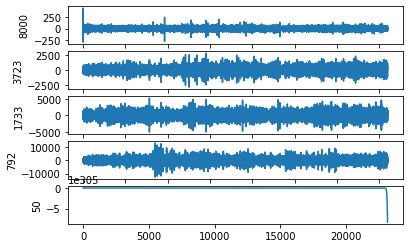

In [ ]:
import audiosegment

def visualize(spect, frequencies, title=""):
    # Visualize the result of calling seg.filter_bank() for any number of filters
    i = 0
    for freq, (index, row) in zip(frequencies[::-1], enumerate(spect[::-1, :])):
        plt.subplot(spect.shape[0], 1, index + 1)
        if i == 0:
            plt.title(title)
            i += 1
        plt.ylabel("{0:.0f}".format(freq))
        plt.plot(row)
    plt.show()

seg = audiosegment.from_file("/content/wav_folder/helo_16.wav").resample(sample_rate_Hz=24000, sample_width=2, channels=1)
spec, frequencies = seg.filter_bank(nfilters=5)
visualize(spec, frequencies)

In [ ]:
# Example for plotting a spectrogram using this function

seg = audiosegment.from_file("/content/wav_folder/helo_18.wav")
freqs, times, amplitudes = seg.spectrogram(window_length_s=0.03, overlap=0.5)
amplitudes = 10 * np.log10(amplitudes + 1e-9)

# Plot
plt.pcolormesh(times, freqs, amplitudes)
plt.xlabel("Time in Seconds")
plt.ylabel("Frequency in Hz")
plt.show()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 1323 is greater than input length  = 2, using nperseg = 2
  .format(nperseg, input_length))


ValueError: ignored